**Importing the required libraries for to load and visualize the data set**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,r2_score,mean_squared_error

Data set loading

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Fetching information about data set

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Statistical summery

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Finding the outliers in the bmi columns

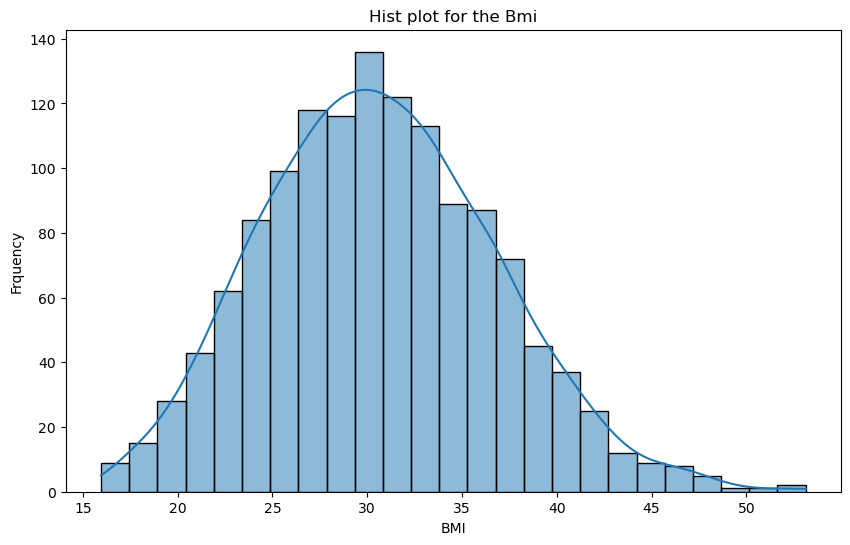

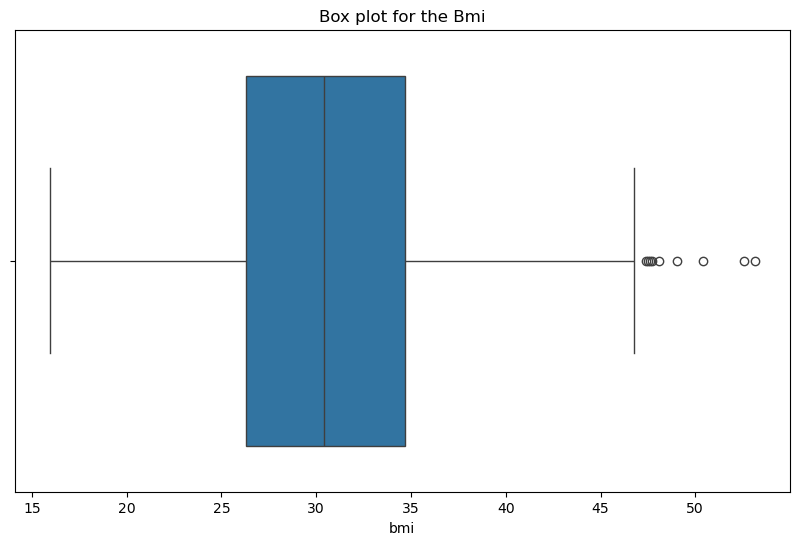

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(df["bmi"],kde=True)
plt.title("Hist plot for the Bmi")
plt.xlabel("BMI")
plt.ylabel("Frquency")
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(x=df["bmi"])
plt.title("Box plot for the Bmi")
plt.show()

Finnding the outliers in the age columns


For age columns we don't have any outliers

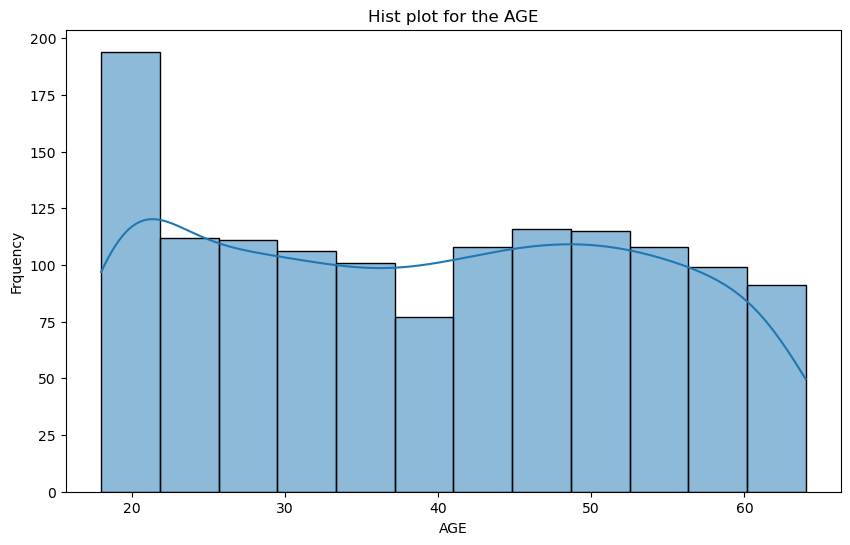

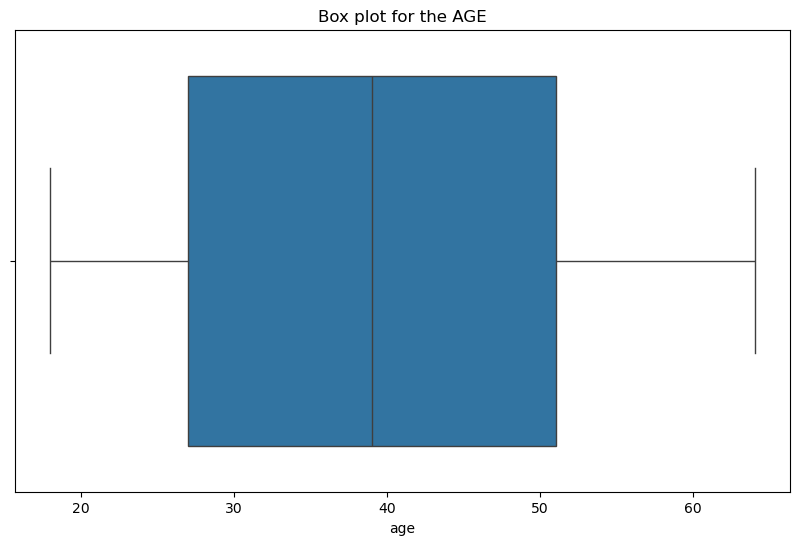

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df["age"],kde=True)
plt.title("Hist plot for the AGE")
plt.xlabel("AGE")
plt.ylabel("Frquency")
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(x=df["age"])
plt.title("Box plot for the AGE")
plt.show()

For this data set we have the outliers in BMI colummns so we have remove them by following steps

In [9]:
#Removing the outliers

Q1=df["bmi"].quantile(0.25)
Q3=df["bmi"].quantile(0.75)

IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

print(f"lower_bound={lower_bound} and upper_bound={upper_bound}")

lower_bound=13.7 and upper_bound=47.290000000000006


In [10]:
no_outliers=df[(df["bmi"]>=lower_bound)&(df["bmi"]<=upper_bound)]
print("Cleaned data set ")
print(f"{no_outliers}")

Cleaned data set 
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1329 rows x 7 columns]


In [11]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


We removed the outliers from bmi and then loaded the cleaned data set to df_cleaned data

In [12]:
df_cleaned=no_outliers

In [13]:
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


As we can see here bmi doesn't contain any outliers

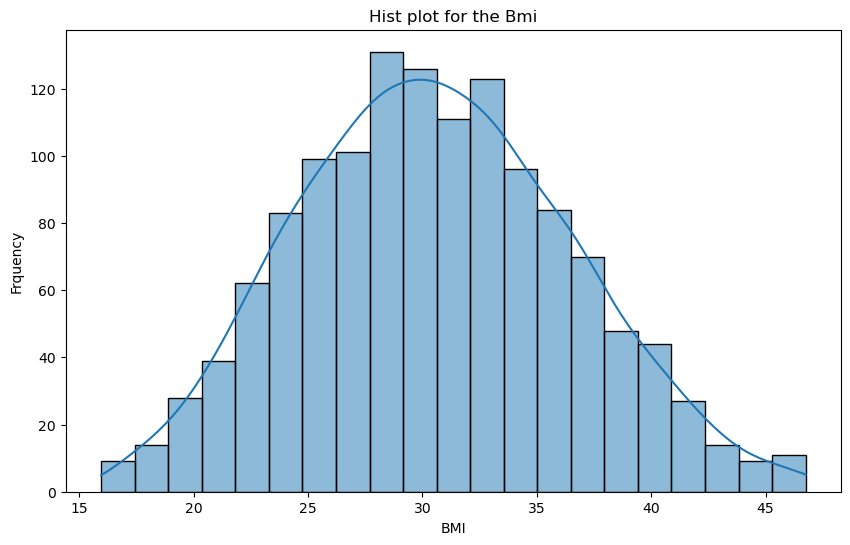

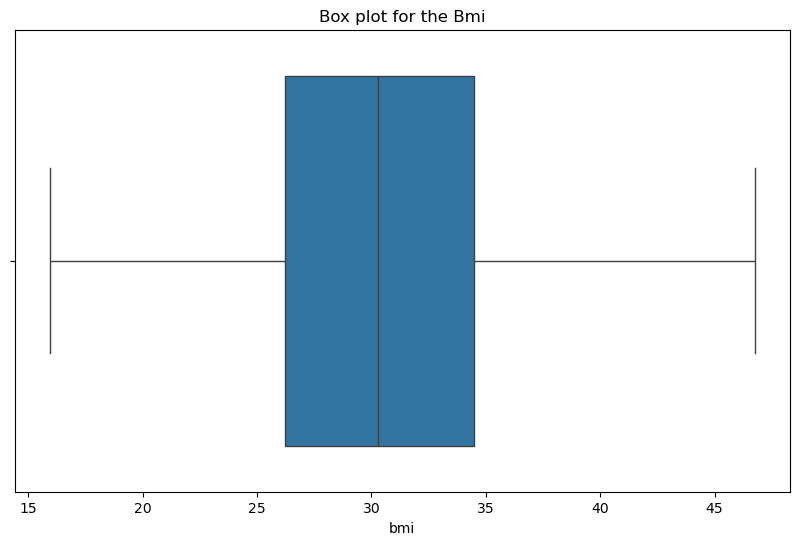

In [14]:
#After removal of the outliers
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned["bmi"],kde=True)
plt.title("Hist plot for the Bmi")
plt.xlabel("BMI")
plt.ylabel("Frquency")
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(x=df_cleaned["bmi"])
plt.title("Box plot for the Bmi")
plt.show()

converting chategorical data to numerical with the help of the label encoding

In [15]:
df_cleaned=pd.get_dummies(df_cleaned,drop_first=True)

Heat map for the above cleaned data set to know the highly corelation with the target columns

Text(0.5, 1.0, 'Heat map for the above cleaned daata set')

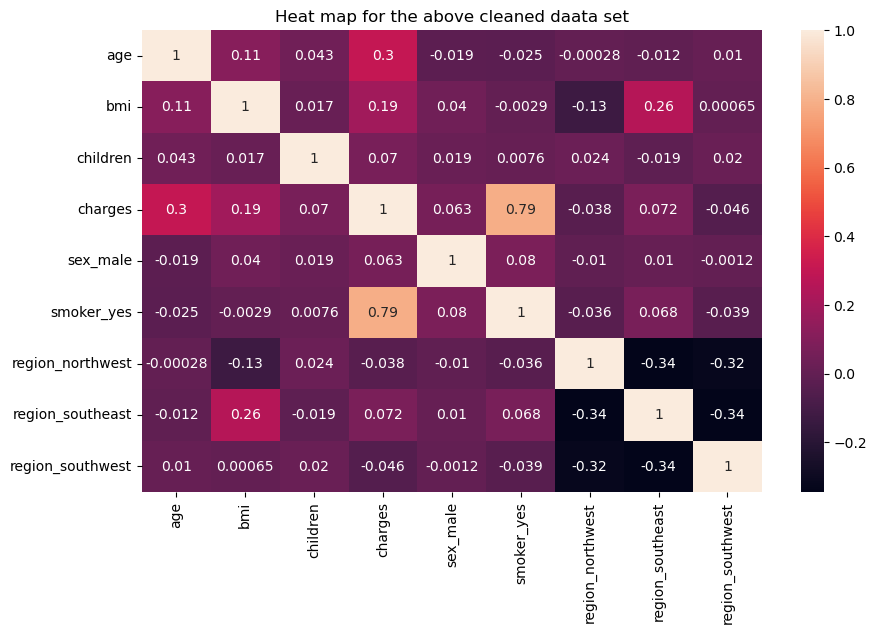

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned.corr(),annot=True)
plt.title("Heat map for the above cleaned daata set")

In [17]:
df_cleaned.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

From the above heatmap we can clearly see that highly correlated columns are ['age','bmi','smoker_yes']

Deviding the data columns into 2 parts input and outputs

In [18]:
x=df_cleaned[['age','bmi','smoker_yes']]
y=df_cleaned['charges']

Spliting the data into training the testin parts

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

Model calling

In [20]:
model=LinearRegression()

Model training

In [21]:
model.fit(x_train,y_train)

LinearRegression()

Model testing

In [22]:
y_pred=model.predict(x_test)
y_train_pred=model.predict(x_train)

Checking r2_score for training and testing data

In [23]:
print(r2_score(y_test,y_pred))
print(r2_score(y_train,y_train_pred))

0.8220295502696762
0.7231907587582389


Finding best random state value with the help of for loop for test result

In [24]:
l=[]

for i in range(100):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  accu=r2_score(y_test,y_pred)
  l.append(accu)

print(f"best r2_score is {max(l)} for the random state {l.index(max(l))}")

best r2_score is 0.8220295502696762 for the random state 22


Model loading and dumping

In [25]:
import joblib

joblib.dump(model,"model.pkl")

['model.pkl']

In [26]:
joblib.load("model.pkl")

LinearRegression()

In [27]:
# After loading the model
try:
    expected_features = model.feature_names_in_
except AttributeError:
    st.error("Model does not store feature names. Please confirm training features.")
    expected_features = ["age", "bmi", "smoker_yes"]  # fallback


In [28]:
input_encoded = pd.DataFrame(0, index=[0], columns=expected_features)
input_encoded["age"] = df_cleaned["age"].iloc[0]
input_encoded["bmi"] = df_cleaned["bmi"].iloc[0]
if "smoker_yes" in expected_features:
    input_encoded["smoker_yes"] = df_cleaned["smoker_yes"].iloc[0]


Predicting the charges for rrandom value

In [29]:
print(model.predict([[22,32,0]]))

[4392.33142568]


C:\Users\Varun\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
